In [42]:
%load_ext autoreload
%autoreload 2
import cv2

participant_number = '3'
video_path = f"./datasets/MIT/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from models.frame import Frame
from typing import List
import random

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()
num_selected_frames = 20
frames_selection = random.sample(frames, num_selected_frames)

# Facial Landmarks

In [45]:
from utils.face_analyzer import FaceAnalyzer

face_analyzer = FaceAnalyzer()

for frame in frames_selection:
    detected_faces_landmarks = face_analyzer.process_image(frame.image)
    frame.facial_landmarks = face_analyzer.get_facial_landmarks(frame.image, detected_faces_landmarks)

Context leak detected, msgtracer returned -1
I0000 00:00:1739909278.598960  590452 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1739909278.639324  635019 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739909278.656685  635019 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


# Face

In [18]:

for frame in frames_selection:
    face_analyzer = FaceAnalyzer(frame.image)
    frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks)

I0000 00:00:1739900314.936639  489126 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1739900314.939396  496793 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739900314.946916  496794 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1739900314.961208  489126 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1739900314.964052  496801 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739900314.970646  496799 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1739900314.982835  489126 gl_context.cc:

# Smile

In [4]:
for frame in frames_selection:
    frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

# Selected Facial Features

In [27]:
for frame in frames_selection:
    if frame.facial_landmarks:
        frame.selected_facial_landmarks = face_analyzer.get_selected_facial_landmarks(frame.facial_landmarks)

TypeError: 'NormalizedLandmarkList' object is not subscriptable

# Head Pose

In [29]:
for frame in frames_selection:
    face_analyzer.get_head_pose_using_mediapipe(frame.image)

NameError: name 'face_mesh' is not defined

# Display Frames

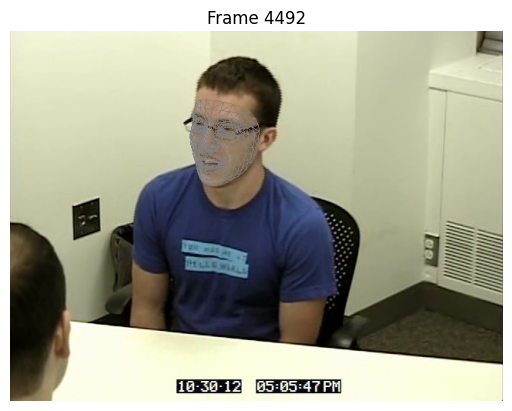

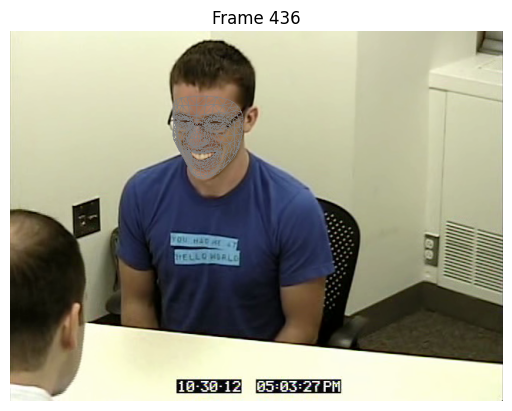

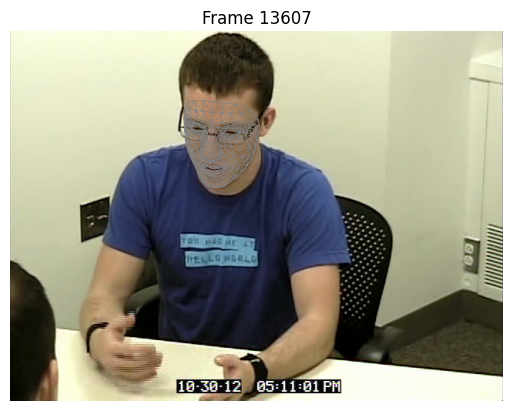

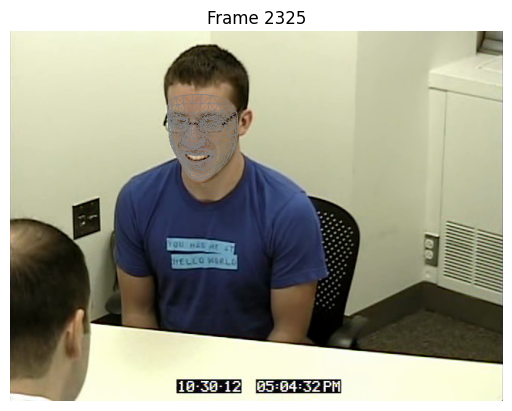

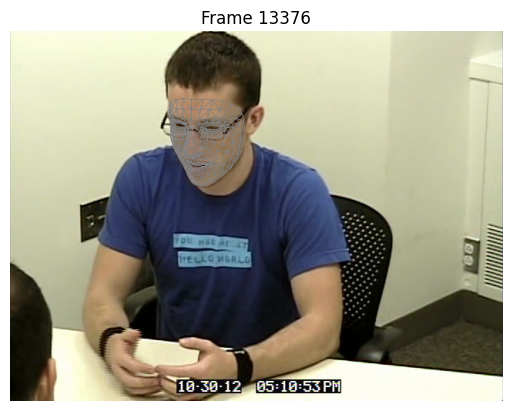

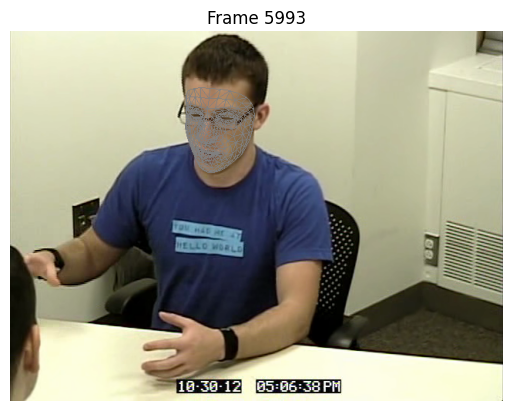

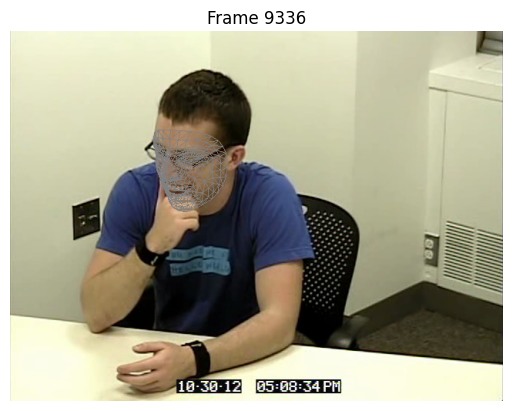

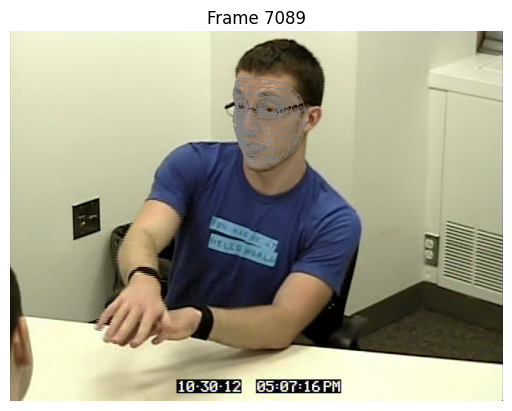

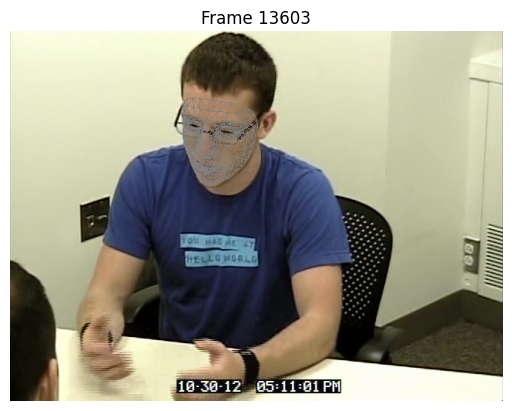

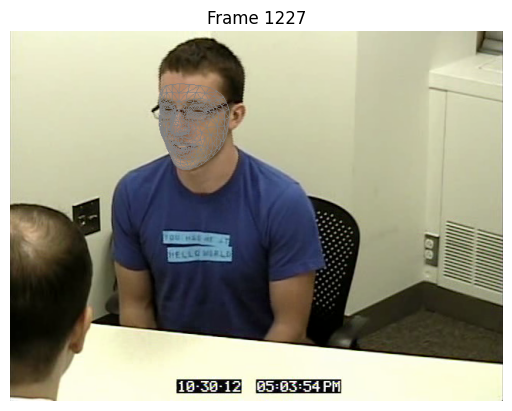

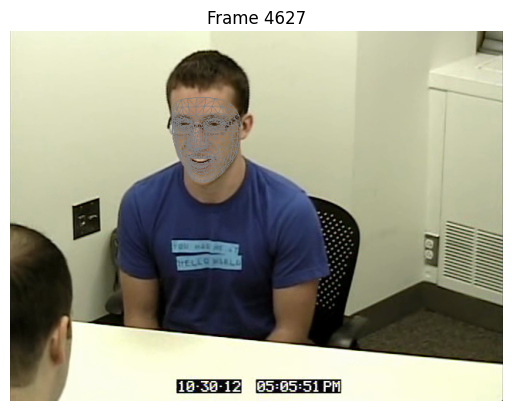

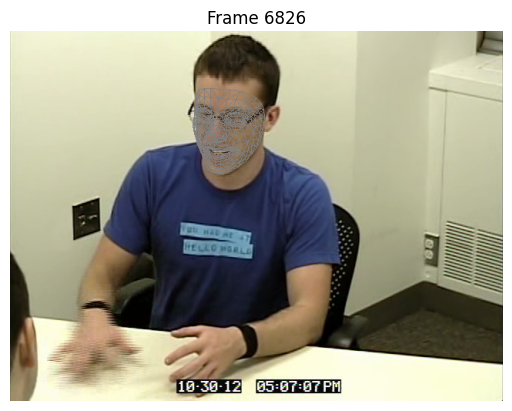

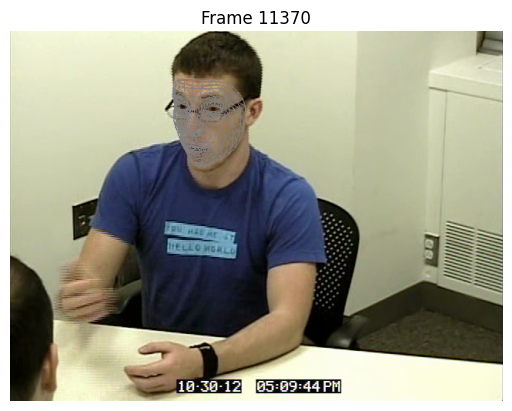

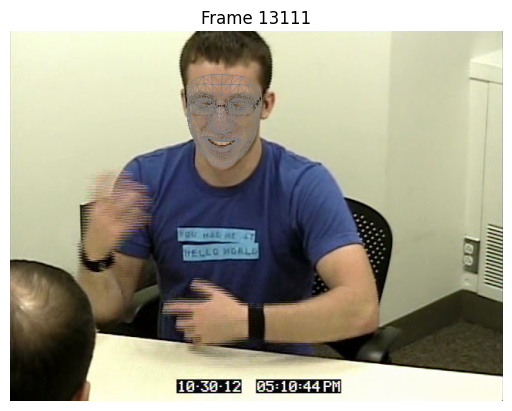

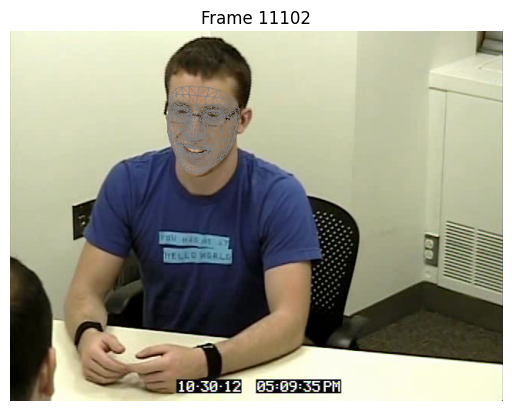

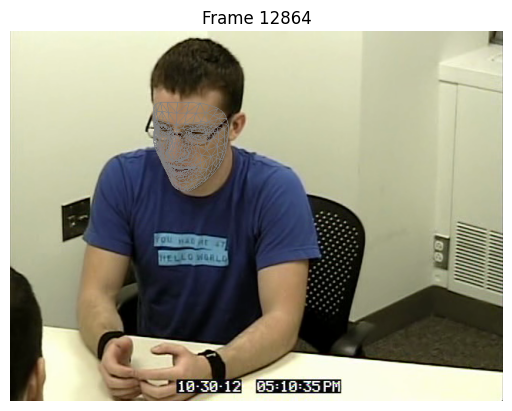

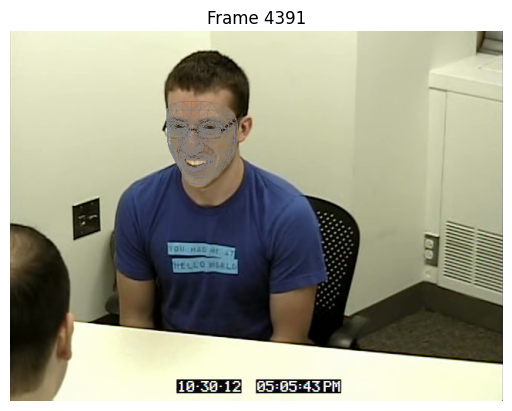

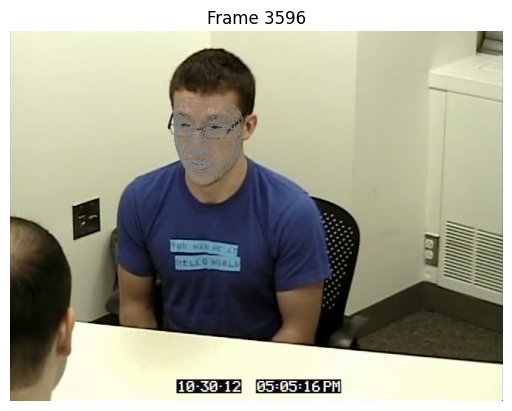

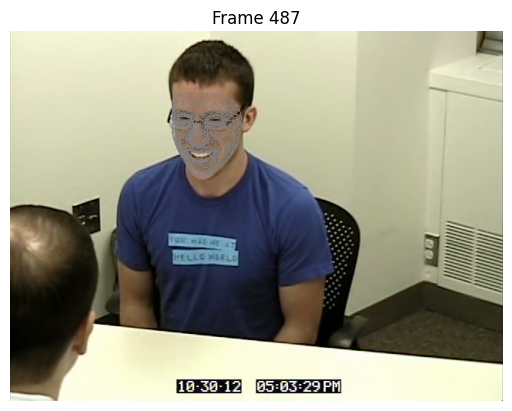

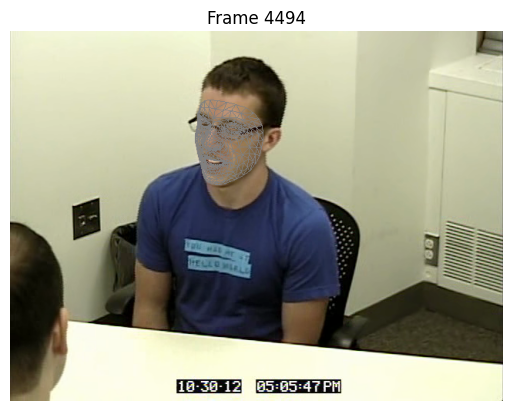

In [46]:
for frame in frames_selection:
    frame.reset_drawable_image()
    # frame.draw_face()
    # frame.draw_smile()
    # frame.draw_selected_facial_landmarks()
    frame.draw_facial_landmarks()
    frame.display()